Importing pandas and numpy library for doing data exploration.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

['companies_sorted.csv']


Loading the csv file into the memory into a pandas dataframe.
Printing the first 5 rows to check the data.

In [2]:
dataframe_companies = pd.read_csv("../input/companies_sorted.csv")
dataframe_companies.head()

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960


Let's perform the subset selection. Select the columns that we care about and ignore the rest of the data.

In [3]:
dataframe_companies = dataframe_companies[['name','year founded','industry','size range','country','current employee estimate']]
dataframe_companies.head()

,name,year founded,industry,size range,country,current employee estimate
0,ibm,1911.0,information technology and services,10001+,united states,274047
1,tata consultancy services,1968.0,information technology and services,10001+,india,190771
2,accenture,1989.0,information technology and services,10001+,ireland,190689
3,us army,1800.0,military,10001+,united states,162163
4,ey,1989.0,accounting,10001+,united kingdom,158363


Printing the info of the dataframe to check what type of data is held within each column. 
Each column that has datatype set to object is potentially a categorical data.

In [4]:
print(dataframe_companies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 6 columns):
name                         object
year founded                 float64
industry                     object
size range                   object
country                      object
current employee estimate    int64
dtypes: float64(1), int64(1), object(4)
memory usage: 328.4+ MB
None


Drawing a box plot for checking retlationship of categorical feature and continious feature.

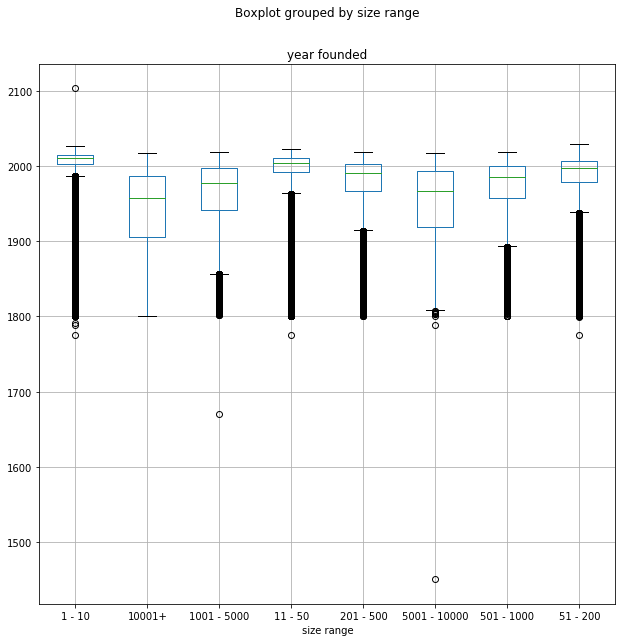

In [5]:
dataframe_companies.boxplot('year founded','size range',figsize = (10,10))

Printing total null values in the dataset. Then printing the column wise distribution of null values across dataset.

In [6]:
print('Total null values in the dataset: ',dataframe_companies.isnull().values.sum())
print('Column wise distribution of null values in the dataset')
print(dataframe_companies.isnull().sum())

Total null values in the dataset:  6246193
Column wise distribution of null values in the dataset
name                               3
year founded                 3606980
industry                      290003
size range                         0
country                      2349207
current employee estimate          0
dtype: int64


Handling the missing or null values.

In [7]:
#Removing the row where company name is null. Since it's completely useless. There are 3 rows where company name is null.
#axis = 0 defines that we need to delete the row. If axis is 1 then the column would be deleted.
#subset defines which column to consider for null values.
dataframe_companies = dataframe_companies.dropna(axis = 0,subset = ['name'])

#Cross checking if the null values were deleted properly.
print('Total null values in the dataset: ',dataframe_companies.isnull().values.sum())
print('Column wise distribution of null values in the dataset')
print(dataframe_companies.isnull().sum())

Total null values in the dataset:  6246187
Column wise distribution of null values in the dataset
name                               0
year founded                 3606978
industry                      290003
size range                         0
country                      2349206
current employee estimate          0
dtype: int64


In [8]:
#fill the null values in the country by inserting "missing" in the column where it's null or empty.
dataframe_companies['country'].fillna('missing',inplace = True)
dataframe_companies['industry'].fillna('missing',inplace = True)

#Keep only those rows where we have atleast 3 non null column values. Drop rest of them.
dataframe_companies.dropna(thresh = 3, inplace = True)

#Cross checking 
print('Total null values in the dataset: ',dataframe_companies.isnull().values.sum())
print('Column wise distribution of null values in the dataset')
print(dataframe_companies.isnull().sum())

Total null values in the dataset:  3606978
Column wise distribution of null values in the dataset
name                               0
year founded                 3606978
industry                           0
size range                         0
country                            0
current employee estimate          0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f679300cbe0>]],
      dtype=object)

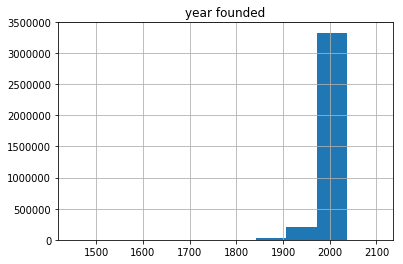

In [9]:
#Drawing a histogram for the year.
dataframe_companies.hist('year founded',bins = 10)

Printing the median of the year. Since from the figure it's pretty much clear the year founded field has a median somewhere in mid 2000s

In [10]:
print(dataframe_companies['year founded'].median())

2009.0


Filling in the missing value with median

In [11]:
dataframe_companies.fillna(dataframe_companies['year founded'].median(), inplace = True)

#Cross checking 
print('Total null values in the dataset: ',dataframe_companies.isnull().values.sum())
print('Column wise distribution of null values in the dataset')
print(dataframe_companies.isnull().sum())

Total null values in the dataset:  0
Column wise distribution of null values in the dataset
name                         0
year founded                 0
industry                     0
size range                   0
country                      0
current employee estimate    0
dtype: int64


Converting the categorical data into numerical data. 
Printing all the unique values for a categorical data to check,
* Nominal : no order associated
* ordinal : some order associated
* continious : infine values between two values

In [12]:
dataframe_companies.industry.value_counts()


information technology and services     453043
marketing and advertising               338162
missing                                 290003
construction                            257921
management consulting                   194556
real estate                             193486
computer software                       191269
internet                                172208
financial services                      170880
health, wellness and fitness            145671
hospital & health care                  140594
education management                    136745
retail                                  121085
design                                  120153
automotive                              104143
non-profit organization management       99075
hospitality                              98040
food & beverages                         92537
accounting                               89203
entertainment                            89128
professional training & coaching         84753
law practice 

Industry is a nominal data type since there is no order associated with the industry. 
Let's use Scikit learn label encoder for converting the nominal data into numeric data by assigning a unique number from 0 to N - 1 = 0 to 148 for each industry.

In [13]:
labelEncoder = LabelEncoder()
industry_labels = labelEncoder.fit_transform(dataframe_companies['industry'])
industry_mappings = {index: label for index, label in enumerate(labelEncoder.classes_)}
print(industry_mappings)

{0: 'accounting', 1: 'airlines/aviation', 2: 'alternative dispute resolution', 3: 'alternative medicine', 4: 'animation', 5: 'apparel & fashion', 6: 'architecture & planning', 7: 'arts and crafts', 8: 'automotive', 9: 'aviation & aerospace', 10: 'banking', 11: 'biotechnology', 12: 'broadcast media', 13: 'building materials', 14: 'business supplies and equipment', 15: 'capital markets', 16: 'chemicals', 17: 'civic & social organization', 18: 'civil engineering', 19: 'commercial real estate', 20: 'computer & network security', 21: 'computer games', 22: 'computer hardware', 23: 'computer networking', 24: 'computer software', 25: 'construction', 26: 'consumer electronics', 27: 'consumer goods', 28: 'consumer services', 29: 'cosmetics', 30: 'dairy', 31: 'defense & space', 32: 'design', 33: 'e-learning', 34: 'education management', 35: 'electrical/electronic manufacturing', 36: 'entertainment', 37: 'environmental services', 38: 'events services', 39: 'executive office', 40: 'facilities servi

Adding these labels to our dataset as a new column.

In [14]:
dataframe_companies['industry_mapping'] = LabelEncoder().fit_transform(dataframe_companies['industry'])
dataframe_companies.head()

,name,year founded,industry,size range,country,current employee estimate,industry_mapping
0,ibm,1911.0,information technology and services,10001+,united states,274047,63
1,tata consultancy services,1968.0,information technology and services,10001+,india,190771,63
2,accenture,1989.0,information technology and services,10001+,ireland,190689,63
3,us army,1800.0,military,10001+,united states,162163,89
4,ey,1989.0,accounting,10001+,united kingdom,158363,0


Performing the same steps for country field for converting categorical data to numerical data.

In [15]:
dataframe_companies.country.value_counts()


missing                      2349206
united states                2278866
united kingdom                511969
canada                        186621
india                         144444
spain                         143940
netherlands                   136808
germany                       118575
australia                     117133
france                        114706
italy                         109818
brazil                        108382
belgium                        47581
china                          36548
turkey                         35350
sweden                         34942
mexico                         33701
switzerland                    32742
denmark                        29213
south africa                   26631
norway                         25936
argentina                      24483
poland                         21954
united arab emirates           21639
portugal                       21586
chile                          21030
ireland                        20426
n

In [16]:
dataframe_companies['country_mapping'] = LabelEncoder().fit_transform(dataframe_companies['country'])
dataframe_companies.head()

,name,year founded,industry,size range,country,current employee estimate,industry_mapping,country_mapping
0,ibm,1911.0,information technology and services,10001+,united states,274047,63,226
1,tata consultancy services,1968.0,information technology and services,10001+,india,190771,63,92
2,accenture,1989.0,information technology and services,10001+,ireland,190689,63,96
3,us army,1800.0,military,10001+,united states,162163,89,226
4,ey,1989.0,accounting,10001+,united kingdom,158363,0,225


Renaming certain column headers since there is space between the column names.

In [17]:
dataframe_companies.rename(index=str, columns={"size range": "size_range","year founded": "year_founded","current employee estimate":"current_employee_estimate"},inplace = True)
dataframe_companies.head()


,name,year_founded,industry,size_range,country,current_employee_estimate,industry_mapping,country_mapping
0,ibm,1911.0,information technology and services,10001+,united states,274047,63,226
1,tata consultancy services,1968.0,information technology and services,10001+,india,190771,63,92
2,accenture,1989.0,information technology and services,10001+,ireland,190689,63,96
3,us army,1800.0,military,10001+,united states,162163,89,226
4,ey,1989.0,accounting,10001+,united kingdom,158363,0,225


Checking how many unique values the size range contains

In [18]:
dataframe_companies.size_range.value_counts()

1 - 10          5585398
11 - 50         1126610
51 - 200         324851
201 - 500         78494
501 - 1000        28394
1001 - 5000       24537
5001 - 10000       3044
10001+             2095
Name: size_range, dtype: int64

Converting this categorical variable into labels by label encoder

In [19]:
dataframe_companies['size_range_mapping'] = LabelEncoder().fit_transform(dataframe_companies['size_range'])
dataframe_companies.head()

,name,year_founded,industry,size_range,country,current_employee_estimate,industry_mapping,country_mapping,size_range_mapping
0,ibm,1911.0,information technology and services,10001+,united states,274047,63,226,1
1,tata consultancy services,1968.0,information technology and services,10001+,india,190771,63,92,1
2,accenture,1989.0,information technology and services,10001+,ireland,190689,63,96,1
3,us army,1800.0,military,10001+,united states,162163,89,226,1
4,ey,1989.0,accounting,10001+,united kingdom,158363,0,225,1


Convert the year field from float to int.

In [20]:
dataframe_companies['year_founded'] = dataframe_companies['year_founded'].astype(np.int64)
print(dataframe_companies.info())
dataframe_companies.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7173423 entries, 0 to 7173425
Data columns (total 9 columns):
name                         object
year_founded                 int64
industry                     object
size_range                   object
country                      object
current_employee_estimate    int64
industry_mapping             int64
country_mapping              int64
size_range_mapping           int64
dtypes: int64(5), object(4)
memory usage: 547.3+ MB
None


,name,year_founded,industry,size_range,country,current_employee_estimate,industry_mapping,country_mapping,size_range_mapping
0,ibm,1911,information technology and services,10001+,united states,274047,63,226,1
1,tata consultancy services,1968,information technology and services,10001+,india,190771,63,92,1
2,accenture,1989,information technology and services,10001+,ireland,190689,63,96,1
3,us army,1800,military,10001+,united states,162163,89,226,1
4,ey,1989,accounting,10001+,united kingdom,158363,0,225,1


We have now successfully converted all the fields to numerical data. 
For countries and industry we can further create one-hot encoding since there is no order associated with them in future. 
Also just drop the categorical textual fields and save the table.

Saving the dataset as CSV before more modification. So that we have a CSV backup. Check out the output tab on the left navigation bar to see the result. Click on the download dataset to download it.

In [21]:
dataframe_companies.to_csv('Companies_Cleaned_Dataset.csv', sep=',', encoding='utf-8')
